In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [195]:
IMAGE="C:\\Users\\be34gof\\Downloads\\20211206\\PE_226-23h_08.tif"

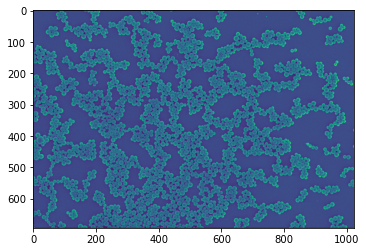

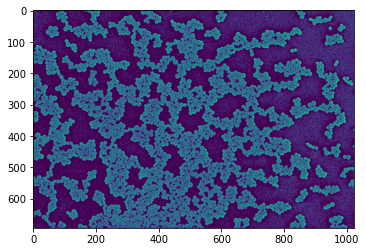

In [199]:
im = Image.open(IMAGE)
imarray = np.array(im)
footer_idx=(imarray.mean(1)[int(imarray.shape[0]/2):]>200).argmax()+int(imarray.shape[0]/2)


oimg = imarray[:footer_idx]
img=oimg - oimg.min()
img=img/img.max()
plt.imshow(img)
plt.show()
plt.close()
img[img<=np.median(img)]=0
plt.imshow(img)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


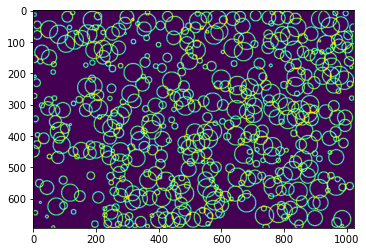

In [200]:
grayImage = cv2.cvtColor((img*255).astype('uint8'), cv2.COLOR_GRAY2BGR)


circles = cv2.HoughCircles((img*255).astype('uint8'), cv2.HOUGH_GRADIENT, 1, 20,
                           param1=180, param2=10, minRadius=2, maxRadius=30
                           )
circles
angle = np.linspace( 0 , 2 * np.pi , 400 )
c_mask=np.zeros_like(img,dtype=bool)
for c in circles[0]:
    #c_mask=np.zeros_like(img,dtype=bool)
    cx,cy,r=c
    if cx<0 or cy<0 or cy>=c_mask.shape[0] or cx>=c_mask.shape[1]:
        continue
    if img[int(cy),int(cx)]==0:
        print("nan")
        continue
    for _r in [r+n for n in range(-1,2)]:
        x = _r * np.cos( angle ) + cy
        y = _r * np.sin( angle ) + cx
        xy=np.concatenate([[x],[y]],0).T.astype(int)
        for _x,_y in xy:
            if _y<0 or _x <0 or _x>=c_mask.shape[0] or _y>=c_mask.shape[1]:
                continue
            c_mask[ _x,_y]=1

        
plt.imshow(c_mask)

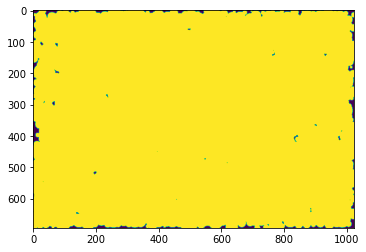

In [201]:
filled_c_mask=np.zeros_like(img,dtype=bool)
for c in circles[0]:
    _c_mask=np.zeros_like(img,dtype=bool)
    cx,cy,r=c
    
    xr=np.arange(max(0,cx-r),min(img.shape[1],cx+r+1))
    yr=np.arange(max(0,cy-r),min(img.shape[0],cy+r+1))
    r2=r**2
    for _x in xr:
        for _y in yr:
            if (_x-cx)**2 + (_y-cy)**2 <=r2:
                filled_c_mask[int(_y),int(_x)]=1
        
plt.imshow(filled_c_mask)

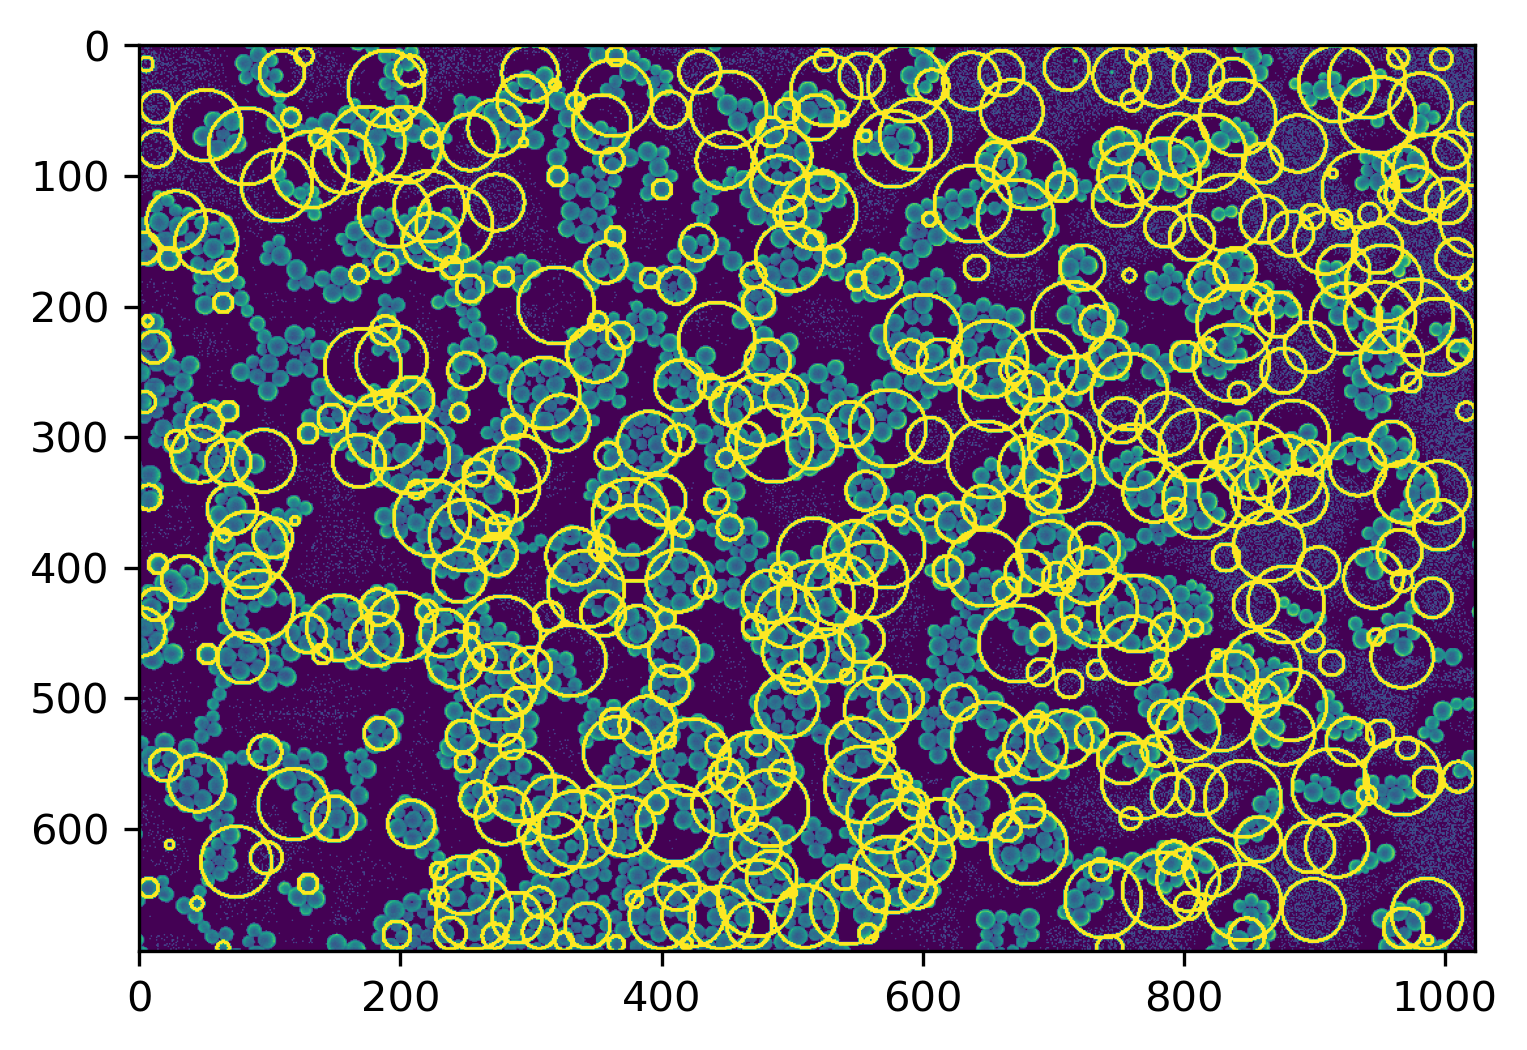

In [202]:
plt.figure(dpi=300)
_img=img.copy()
_img[c_mask]=1
plt.imshow(_img)

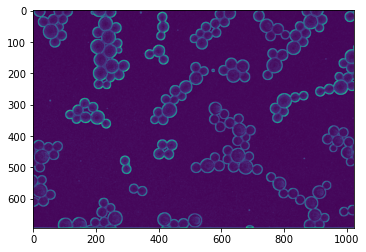

In [81]:
base_contourimage=img.copy()
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        round=img[max(0,x-1):min(x+2,img.shape[0]),max(0,y-1):min(y+2,img.shape[1])]
        base_contourimage[x,y]=round.max()-round.min()
plt.imshow(base_contourimage)

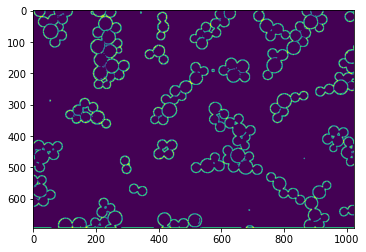

In [82]:
contourimage_hc = base_contourimage.copy()
contourimage_hc[contourimage_hc<0.2]=0
contourimage_hc[contourimage_hc>0]=1
contourimage_hc=contourimage_hc.astype(bool)
plt.imshow(contourimage_hc)

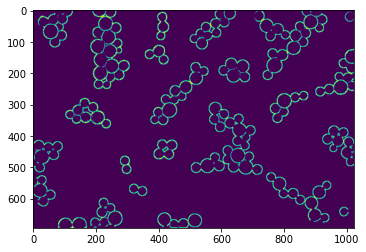

In [83]:
hc_mask=contourimage_hc*c_mask
plt.imshow(hc_mask)

(array([ 2., 10., 17., 37., 46., 16.,  9., 11., 14., 10.]),
 array([ 9.4     , 10.849999, 12.299999, 13.75    , 15.2     , 16.65    ,
        18.1     , 19.55    , 21.      , 22.449999, 23.9     ],
       dtype=float32),
 <BarContainer object of 10 artists>)

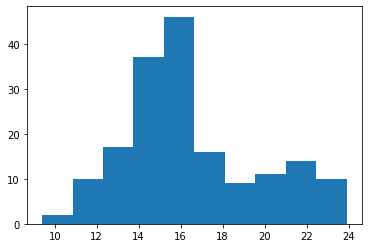

In [109]:
radii=[]
for c in circles[0]:
    #c_mask=np.zeros_like(img,dtype=bool)
    cx,cy,r=c
    radii.append(r)
plt.hist(radii,10)